In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
MC_N = 10**4   # 데이터 생성 시뮬레이션 횟수
MC_N = MC_N 

size_x = 25   # x축 사이즈
size_y = 25   # y축 사이즈

X_x_list = np.random.rand(MC_N,1) * size_x    # 0과 25 사이 임의의 타겟 데이터의 x값 생성
X_x_list = X_x_list.flatten().tolist()
X_y_list = np.random.rand(MC_N,1) * size_y    # 0과 25 사이 임의의 타겟 데이터의 y값 생성
X_y_list = X_y_list.flatten().tolist()

sensor_ref_x_list = [0] * MC_N                      #sensor ref x coordinate
sensor_ref_y_list = [0] * MC_N                      #sensor ref  y coordinate
sensor_one_x_list = [size_x] * MC_N                 #sensor 1 x coordinate
sensor_one_y_list = [0] * MC_N                      #sensor 1 y coordinate
sensor_two_x_list = [0] * MC_N                      #sensor 2 x coordinate
sensor_two_y_list = [size_y] * MC_N                 #sensor 2 y coordinate
sensor_three_x_list = [size_x] * MC_N                #sensor 3 x coordinate
sensor_three_y_list = [size_y] * MC_N                #sensor 3 y coordinate

In [3]:
def create_environment_error(distance):
    error_rate = 0.3
    if(float(np.random.rand()) < error_rate):
        obstacle_heigth =  3 * np.random.rand()   #부딪히는 물체의 길이
        if(distance < obstacle_heigth):         # 말이 안되는거 그냥 0으로 채워 넣음
            return 0
        
        #By 프레넬 영역을 이용한 추가 이동 거리 구현(함 위에 사이트 읽어보고 이상하다 싶으면 바로 말해줘요)
        distance1 = np.random.randn() + (distance/2)
        distance2 = distance - distance1
        if(distance1 < 0 or distance2 < 0):     # 말이 안되는거 그냥 0으로 채워 넣음
            return 0 
        
        Fresnel_a = 0.01 * math.sqrt(distance1 * distance2 / (distance1+distance2))

        break_n = 1
        while(Fresnel_a < obstacle_heigth):
            Fresnel_a = Fresnel_a * (break_n+1) / break_n
            break_n +=1
        
        distance_final = math.sqrt(np.square(distance1) + np.square(Fresnel_a)) + math.sqrt(np.square(distance2) + np.square(Fresnel_a))
        
        # 너무 이상한값 우리선에서 정리
        if(distance_final > 100):
            distance_final = 100
        
    else:
        distance_final = distance

    return distance_final

In [4]:
max_device_error = 0.1  #위의 사진에 의해 device 기기의 에러값 선언 (미터)

noise_x_list = []
noise_y_list = []


while(len(noise_x_list) != MC_N):
    #평균0 표준편차가 1인 가우시안 표준정규분포 난수 생성 뒤 max_device_error을 곱하여 맥시멈 에러에 대해 스케일링
    temp_x = np.random.randn()  * max_device_error   
    temp_y = np.random.randn()  * max_device_error
    
    if( (temp_x**2 + temp_y**2 < max_device_error ** 2) ):    
        noise_x_list.append(temp_x)
        noise_y_list.append(temp_y)
    
    
X_hat_x_list = [x+y for x,y in zip(X_x_list, noise_x_list)]   #기기를 통해 생성되는 측정되는 좌표의 x값 
X_hat_y_list = [x+y for x,y in zip(X_y_list, noise_y_list)]   #기기를 통해 생성되는 측정되는 좌표의 y값 

distance_ref_X_list = [-100] * MC_N  
distance_one_X_list = [-100] * MC_N  
distance_two_X_list = [-100] * MC_N 
distance_three_X_list = [-100] * MC_N  

distance_ref_X_hat_list = [-100] * MC_N  
distance_one_X_hat_list = [-100] * MC_N  
distance_two_X_hat_list = [-100] * MC_N  
distance_three_X_hat_list = [-100] * MC_N  


for i in range(MC_N):
    X_x = X_x_list[i]
    X_y = X_y_list[i]
    
    X_hat_x = X_hat_x_list[i]
    X_hat_y = X_hat_y_list[i]
    
    sensor_ref_x = sensor_ref_x_list[i]
    sensor_ref_y = sensor_ref_y_list[i]
    sensor_one_x = sensor_one_x_list[i]
    sensor_one_y = sensor_one_y_list[i]
    sensor_two_x = sensor_two_x_list[i]
    sensor_two_y = sensor_two_y_list[i]
    sensor_three_x = sensor_three_x_list[i]
    sensor_three_y = sensor_three_y_list[i]
    
    distance_ref_X_hat_list[i] = math.sqrt((X_hat_x - sensor_ref_x)**2 + (X_hat_y - sensor_ref_y)**2)  # ref과 Xhat 거리
    distance_one_X_hat_list[i] = math.sqrt((X_hat_x - sensor_one_x)**2 + (X_hat_y - sensor_one_y)**2)  # 1과 Xhat 거리
    distance_two_X_hat_list[i] = math.sqrt((X_hat_x - sensor_two_x)**2 + (X_hat_y - sensor_two_y)**2)  # 2와 Xhat 거리
    distance_three_X_hat_list[i] = math.sqrt((X_hat_x - sensor_three_x)**2 + (X_hat_y - sensor_three_y)**2)  # 3과 타Xhat 거리

df = pd.DataFrame(data = {'X_x':X_x_list , 'X_y' : X_y_list , 
                         'X_noise_x':noise_x_list , 'X_noise_y' : noise_y_list , 
                          'X_hat_x':X_hat_x_list ,'X_hat_y':X_hat_y_list,
                          'distance_ref_X_hat' : distance_ref_X_hat_list , 'distance_one_X_hat' : distance_one_X_hat_list,
                          'distance_two_X_hat' : distance_two_X_hat_list , 'distance_three_X_hat' : distance_three_X_hat_list   
                         })

In [5]:
df['error_distance_ref_X_hat'] = df['distance_ref_X_hat'].apply(create_environment_error)
df['error_distance_one_X_hat'] = df['distance_one_X_hat'].apply(create_environment_error)
df['error_distance_two_X_hat'] = df['distance_two_X_hat'].apply(create_environment_error)
df['error_distance_three_X_hat'] = df['distance_three_X_hat'].apply(create_environment_error)


df['TDOA_X_hat_ref_one_error'] = df['error_distance_ref_X_hat'] - df['error_distance_one_X_hat']
df['TDOA_X_hat_ref_two_error'] = df['error_distance_ref_X_hat'] - df['error_distance_two_X_hat']
df['TDOA_X_hat_ref_three_error'] = df['error_distance_ref_X_hat'] - df['error_distance_three_X_hat']

df_parsing = df[['TDOA_X_hat_ref_one_error' , 'TDOA_X_hat_ref_two_error' , 'TDOA_X_hat_ref_three_error' , 'X_hat_x' , 'X_hat_y']]
df_parsing.columns = ['TDOA_1', 'TDOA_2', 'TDOA_3' , 'coordinate_x' , 'coordinate_y']

df_parsing = df_parsing.reset_index(drop=True)

In [6]:
def ScalerCoordinate(value):   #world size = area's width and height , value =  x,y coordinate
    world_size = 25
    value = value / world_size
    return value


def ScalerTDOA(value):   #world size = area's width and height , value = TDOA value
    world_size = 25 * 2**(0.5)
    world_size = 100
    value = value / world_size
    return value

num_epochs = 2
batch_size = 10

In [7]:
df = df_parsing

df[['TDOA_1' , 'TDOA_2' , 'TDOA_3']] = df[['TDOA_1' , 'TDOA_2' , 'TDOA_3']].apply(ScalerTDOA)  #길이에 대하여 스케일링
df[['coordinate_x' , 'coordinate_y']] = df[['coordinate_x' , 'coordinate_y']].apply(ScalerCoordinate)  #좌표에 대하여 스케일링

train_df , test_df = train_test_split(df, test_size = 0.2)

train_TDOAs = train_df[['TDOA_1' , 'TDOA_2' , 'TDOA_3']].to_numpy()
train_X_Hats = train_df[['coordinate_x' , 'coordinate_y']].to_numpy()

test_TDOAs = test_df[['TDOA_1' , 'TDOA_2' , 'TDOA_3']].to_numpy()
test_X_Hats = test_df[['coordinate_x' , 'coordinate_y']].to_numpy()


In [8]:
# Do not modify this block
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(3,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
history = model.fit(train_TDOAs, 
                      train_X_Hats,
                      epochs=num_epochs,
                      batch_size=batch_size, 
                      verbose=1)

Epoch 1/2
800/800 [==============================] - 2s 2ms/step - loss: 0.0214 - mae: 0.0560
Epoch 2/2
800/800 [==============================] - 1s 2ms/step - loss: 1.6177e-04 - mae: 0.0099


[Text(0.5, 1.0, 'loss')]

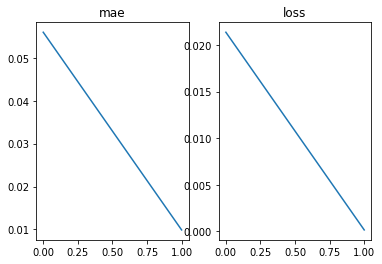

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = history
fig,(ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = False)
ax0.plot(hist.history["mae"], label = 'mae')
ax0.set(title='mae')
ax1.plot(hist.history["loss"], label = 'loss')
ax1.set(title='loss')

In [11]:
predict_X_Hats = model.predict(test_TDOAs)

distance_gap = np.sqrt(np.sum(np.square(predict_X_Hats*25 - test_X_Hats*25), axis = 1))

mean_distance_gap = np.mean(distance_gap)
print('평균 오차 거리 : ' , np.round(mean_distance_gap,4) , '미터')

평균 오차 거리 :  0.336 미터
